In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from scipy import stats



Logistic Regression: This algorithm is a linear classifier that models the probability of the positive class as a function of the input features. It is often used as a baseline algorithm and can perform well when the data is linearly separable.

Support Vector Machines (SVMs): This algorithm aims to find the hyperplane that best separates the positive and negative examples while maximizing the margin. SVMs can perform well when the data is not linearly separable, by mapping the data to a higher-dimensional feature space using a kernel trick.

Random Forests: This algorithm is an ensemble learning method that builds multiple decision trees and averages their predictions to improve the model's accuracy and reduce overfitting. Random forests can be useful when the data has complex interactions between the features, and can also handle missing values and outliers well.

Note that these are just three possible algorithms that can be used for the breast cancer tumor dataset, and other algorithms such as K-Nearest Neighbors, Naive Bayes, and Neural Networks can also be effective depending on the data and the task at hand.

In [135]:
'''
# Generate the dataset
np.random.seed(42)  # for reproducibility
X = np.random.rand(100, 11)  # 100 samples, 5 features
y = np.random.rand(100)  # target variable
'''


# Generate the dataset
np.random.seed(42)  # for reproducibility
X = np.random.rand(500, 11) * np.arange(1, 12)  # input features
#Change target variable to 1 or 0 to represent true or false 
y = np.random.randint(0, 2, 500)  # target variable (binary)


In [136]:
# Create a pandas DataFrame
countries = pd.DataFrame(X, columns=["Puerto-Rico", "Costa-Rico", "Cape-Verde", "Jamaica", "Haiti", 
                         "Dominican-Republic", "Bahamas","DROC","Nigeria","Kenya", "Somalia"])
countries['target'] = y



countries

,Puerto-Rico,Costa-Rico,Cape-Verde,Jamaica,Haiti,Dominican-Republic,Bahamas,DROC,Nigeria,Kenya,Somalia,target
0,0.374540,1.901429,2.195982,2.394634,0.780093,0.935967,0.406585,6.929409,5.410035,7.080726,0.226429,1
1,0.969910,1.664885,0.637017,0.727300,0.917023,1.825453,3.673295,3.455560,2.621062,6.118529,1.534432,0
2,0.292145,0.732724,1.368210,3.140704,0.998369,3.085407,4.146902,0.371603,5.467904,1.705241,0.715568,1
3,0.948886,1.931264,2.425192,1.218455,0.488361,4.105398,3.081067,0.976306,4.456592,0.343885,10.002524,0
4,0.258780,1.325045,0.935133,2.080272,2.733551,1.109127,6.787092,6.201063,8.455490,8.948274,6.576900,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.199093,0.695645,1.860705,2.179204,0.628217,1.738368,1.671262,1.708343,3.700299,7.040315,2.391982,0
496,0.366679,0.781835,2.929370,3.818665,4.000688,1.449954,0.476261,2.535233,2.401151,5.059258,8.555007,0
497,0.858323,1.689728,1.079027,2.748937,1.564171,0.365433,4.910957,0.078620,3.682643,3.293793,7.627153,1
498,0.766245,0.608189,2.434881,1.175667,2.231632,4.362111,4.850442,7.898948,2.026449,6.623179,6.706501,0


In [149]:
'''
np.random.seed(42)

ethni = {"Country": ["Puerto-Rico", "Costa-Rico", "Cape-Verde", "Jamaica", "Haiti", 
                         "Dominican-Republic", "Bahamas","DROC","Nigeria","Kenya", "Somalia"],
             "Population": [10345,3456,12300,345000,432000,12300,2450,2340,76900,2340,2103],
             "Christianity":[np.random.rand(100, 5) * np.arange(1, 6)],
             "Islam": [1-.37,1-.67,1-.59,1-.52,1-.69,1-.53,1-.61,1-.67,1-.60,1-.57,1-.71],
             "Athiest": [-1*(1-(.67+.37)),-1*(1-(.87+.67)),-1*(1-(.79+.59)),-1*(1-(.72+.52)),-1*(1-(.89+.69)),
                         1*(1-(.33+.53)),-1*(1-(.41+.61)),-1*(1-(.47+.67)),1*(1-(.38+.60)),-1*(1-(.77+.57)),-1*(1-(.71+.91))],
             "Republican":[.47,.32,.24,.20,.15,.47,.30,.40,.35,.32,.53],
             "Democrat":[(1-.45),(1-.22),(1-.22),(1-.10),(1-.18),(1-.42),(1-.25),(1-.32),(1-.32),(1-.22),(1-.43)],
             "High-School-Diploma": [.924,.827,.968,.945,.789,.933,.949,.944,.931,.879,.921],
             "Bachelors-Degree": [.794,.627,.668,.845,.589,.623,.879,.744,.821,.813,.781],
             "Masters-Degree": [.294,.127,.068,.445,.489,.283,.689,.654,.411,.563,.691],}

ethni = pd.DataFrame(ethni)
ethni
'''    
         

'\nnp.random.seed(42)\n\nethni = {"Country": ["Puerto-Rico", "Costa-Rico", "Cape-Verde", "Jamaica", "Haiti", \n                         "Dominican-Republic", "Bahamas","DROC","Nigeria","Kenya", "Somalia"],\n             "Population": [10345,3456,12300,345000,432000,12300,2450,2340,76900,2340,2103],\n             "Christianity":[np.random.rand(100, 5) * np.arange(1, 6)],\n             "Islam": [1-.37,1-.67,1-.59,1-.52,1-.69,1-.53,1-.61,1-.67,1-.60,1-.57,1-.71],\n             "Athiest": [-1*(1-(.67+.37)),-1*(1-(.87+.67)),-1*(1-(.79+.59)),-1*(1-(.72+.52)),-1*(1-(.89+.69)),\n                         1*(1-(.33+.53)),-1*(1-(.41+.61)),-1*(1-(.47+.67)),1*(1-(.38+.60)),-1*(1-(.77+.57)),-1*(1-(.71+.91))],\n             "Republican":[.47,.32,.24,.20,.15,.47,.30,.40,.35,.32,.53],\n             "Democrat":[(1-.45),(1-.22),(1-.22),(1-.10),(1-.18),(1-.42),(1-.25),(1-.32),(1-.32),(1-.22),(1-.43)],\n             "High-School-Diploma": [.924,.827,.968,.945,.789,.933,.949,.944,.931,.879,.921],\n         

In [150]:
# Split the data into training and test sets 80/20
train_countries, test_countries = train_test_split(countries, test_size=0.2, random_state=42)

# Separate the input features and target variable for training and test sets
X_train = train_countries[["Puerto-Rico", "Costa-Rico", "Cape-Verde", "Jamaica", "Haiti", 
                         "Dominican-Republic", "Bahamas","DROC","Nigeria","Kenya", "Somalia"]]
y_train = train_countries['target']
X_test = test_countries[["Puerto-Rico", "Costa-Rico", "Cape-Verde", "Jamaica", "Haiti", 
                         "Dominican-Republic", "Bahamas","DROC","Nigeria","Kenya", "Somalia"]]
y_test = test_countries['target']

x_train, x_test, Y_train, Y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)



In [151]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to predict the test data
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE) to evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error (MSE) of the model on the test set:", mse)

Mean squared error (MSE) of the model on the test set: 0.27028970044075223


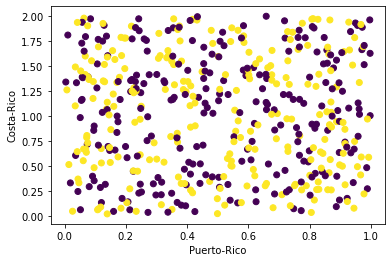

In [152]:
plt.scatter(countries['Puerto-Rico'], countries['Costa-Rico'],c=y)
plt.xlabel('Puerto-Rico')
plt.ylabel('Costa-Rico')
plt.show()

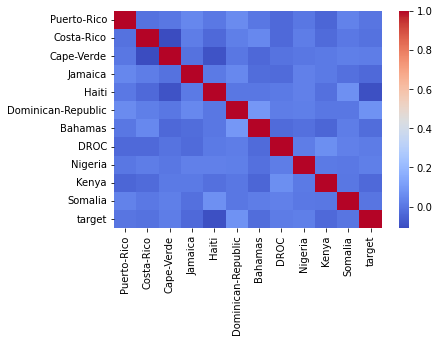

In [153]:
# Create a heatmap of the correlation matrix
corr = countries.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

Text(0.5, 1.02, 'Scatterplot Matrix of Countries Dataset')

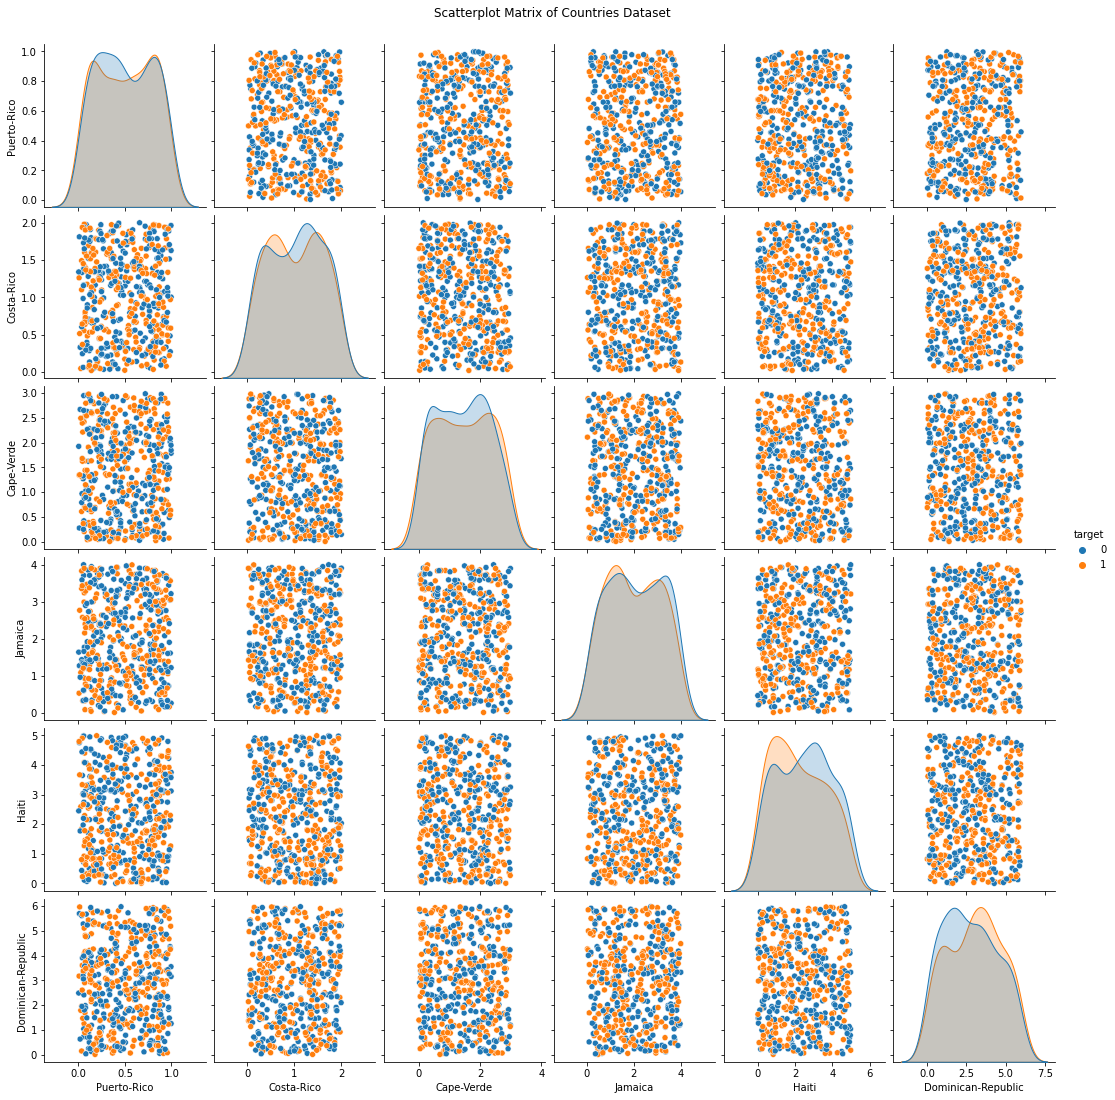

In [154]:
# Create a pairplot using Seaborn
sns.pairplot(countries, hue='target', vars=["Puerto-Rico", "Costa-Rico", "Cape-Verde", "Jamaica", "Haiti", 
                         "Dominican-Republic",])

plt.suptitle("Scatterplot Matrix of Countries Dataset", y=1.02)




<AxesSubplot:xlabel='target', ylabel='Haiti'>

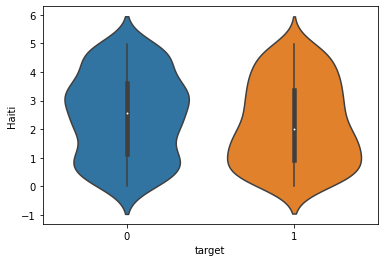

In [142]:
# Create a violin plot using Seaborn
sns.violinplot(x='target', y='Haiti', data=countries)




In [143]:
#Another violin plot
#sns.violinplot(x='target', y='Haiti', hue='Haiti', data=countries)

In [144]:
# Create a KNN classifier with k=3 (default value)
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Use the classifier to predict the test data
y_pred = knn.predict(X_test)

# Calculate accuracy to evaluate the performance of the classifier
#Performance metrics
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")


conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)


cls_report = classification_report(y_test, y_pred)
print(cls_report)


Accuracy Score: 0.49%
[[26 27]
 [24 23]]
              precision    recall  f1-score   support

           0       0.52      0.49      0.50        53
           1       0.46      0.49      0.47        47

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100



In [145]:
# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Fit the classifier to the training data
svm.fit(X_train, y_train)

SVC(kernel='linear')

Explained variance ratios: [0.24812858 0.19129641]


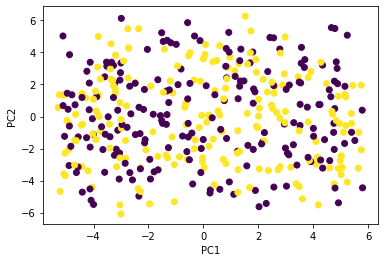

In [146]:
# Perform PCA on the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Print the explained variance ratios of the principal components
print('Explained variance ratios:', pca.explained_variance_ratio_)

# Plot the first two principal components

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [147]:
#Hypothesis testing
hypothesis = "There is no signicant relationship"
HO = "Fail to reject the hypothesis that" , hypothesis
HA = "Reject the hypothesis that" , hypothesis

# Subset the data to include only malignant and benign tumors
PR = countries[countries['target'] == 0]['Puerto-Rico']
DR = countries[countries['target'] == 1]['Dominican-Republic']

# Conduct a t-test to compare the mean value of mean area for malignant and benign tumors
t, p = stats.ttest_ind(PR, DR)

# Print the results
print('t =', t)
print('p =', p)

if p < 0.000000000005:
    print(HA)
else:
    print(HO)

t = -23.343084377178975
p = 5.767730691029704e-82
('Reject the hypothesis that', 'There is no signicant relationship')
